In [2]:
! pip install pandas
! pip install matplotlib

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ae/d9/3741b344f57484b423cd22194025a8489992ad9962196a62721ef9980045/pandas-2.1.4-cp312-cp312-win_amd64.whl.metadata
  Using cached pandas-2.1.4-cp312-cp312-win_amd64.whl.metadata (18 kB)
Using cached pandas-2.1.4-cp312-cp312-win_amd64.whl (10.5 MB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl (187 kB)
Using cached cycler


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
## Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Question no 1

In [6]:
# Importing the necessary library
import pandas as pd

# Defining the URL for the dataset
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Loading the dataset into a Pandas DataFrame
users = pd.read_csv(dataset_url, sep='|', index_col='user_id')

# Calculating the mean age for each occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Calculating the male ratio per occupation and sorting it in descending order
male_ratio_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
male_ratio_per_occupation['male_ratio'] = male_ratio_per_occupation['M'] / (male_ratio_per_occupation['M'] + male_ratio_per_occupation['F'])
sorted_male_ratio = male_ratio_per_occupation['male_ratio'].sort_values(ascending=False)

# Calculating the minimum and maximum ages for each occupation
min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Calculating the mean age for each combination of occupation and gender
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()

# Calculating the percentage of women and men for each occupation
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_per_occupation['female_percentage'] = (gender_percentage_per_occupation['F'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100
gender_percentage_per_occupation['male_percentage'] = (gender_percentage_per_occupation['M'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100

# Displaying the results
print("Mean Age per Occupation:\n", mean_age_per_occupation)
print("\nMale Ratio per Occupation with sorting:\n", sorted_male_ratio)
print("\nMinimum and Maximum Ages per Occupation:\n", min_max_ages_per_occupation)
print("\nMean Age per Occupation and Gender:\n", mean_age_per_combination)
print("\nPercentage of Women and Men per Occupation:\n", gender_percentage_per_occupation)



Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation with sorting:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other

Question no 2

In [8]:
# Importing the necessary library
import pandas as pd

# URL of the Euro 2012 dataset
euro12_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Reading the dataset into a DataFrame called euro12
euro12 = pd.read_csv(euro12_url)

# Selecting only the 'Goals' column and storing it in the variable 'goal_column'
goal_column = euro12['Goals']

# Counting the number of unique teams that participated in Euro 2012
num_teams = euro12['Team'].nunique()

# Determining the total number of columns in the dataset
num_columns = euro12.shape[1]

# Creating a new DataFrame 'discipline' with only the 'Team', 'Yellow Cards', and 'Red Cards' columns
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Sorting the 'discipline' DataFrame first by 'Red Cards' in descending order, then by 'Yellow Cards' in descending order
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

# Calculating the mean number of Yellow Cards given per team
mean_yellow_cards = discipline['Yellow Cards'].mean()

# Filtering teams that scored more than 6 goals and storing the result in 'teams_more_than_6_goals'
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Selecting teams whose names start with the letter 'G' and storing the result in 'teams_starting_with_G'
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Selecting the first 7 columns of the dataset using iloc
first_7_columns = euro12.iloc[:, :7]

# Selecting all columns except the last 3 using iloc
all_columns_except_last_3 = euro12.iloc[:, :-3]

# Selecting the 'Team' and 'Shooting Accuracy' columns for England, Italy, and Russia and storing the result in 'shooting_accuracy_selected_teams'
shooting_accuracy_selected_teams = euro12.loc[euro12['Team'].isin(['Netherlands', 'Portugal', 'Spain']), ['Team', 'Shooting Accuracy']]

# Displaying the results
print("Goal Column:\n", goal_column)
print("\nNumber of Teams in Euro 2012:", num_teams)
print("\nNumber of Columns in the Dataset:", num_columns)
print("\nDiscipline DataFrame:\n", discipline)
print("\nDiscipline DataFrame Sorted:\n", discipline_sorted)
print("\nMean Yellow Cards per Team:", mean_yellow_cards)
print("\nTeams that scored more than 6 goals:\n", teams_more_than_6_goals)
print("\nTeams starting with G:\n", teams_starting_with_G)
print("\nFirst 7 Columns:\n", first_7_columns)
print("\nAll Columns Except Last 3:\n", all_columns_except_last_3)
print("\nShooting Accuracy from Netherlands, Portugal, and Spain:\n", shooting_accuracy_selected_teams)


Goal Column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of Teams in Euro 2012: 16

Number of Columns in the Dataset: 35

Discipline DataFrame:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain           

Question no 3

In [10]:
import pandas as pd
import numpy as np

# Create three Series with random data
random_bedrooms = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
random_bathrooms = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
random_prices = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

# Create a DataFrame by joining the Series by column
df = pd.concat([random_bedrooms, random_bathrooms, random_prices], axis=1)

# Change the name of the columns for clarity
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Create a one-column DataFrame with the values of the 3 Series
bigcolumn = pd.DataFrame(pd.concat([random_bedrooms, random_bathrooms, random_prices], ignore_index=True), columns=['bigcolumn'])

# Check if it goes only until index 99
print(f"Is the index limited to 99? {bigcolumn.index.max() == 99}")

# Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reindex(range(300))

# Display the first and last 5 rows of the reindexed DataFrame
print(bigcolumn.head(5))
print(bigcolumn.tail(5))


Is the index limited to 99? False
   bigcolumn
0          2
1          2
2          2
3          4
4          2
     bigcolumn
295      17304
296      16864
297      15403
298      28050
299      20390


Question no 4

In [9]:
# Import the wind dataset from the file wind.txt
txt_file = 'wind.txt'
data = pd.read_csv(txt_file, sep='\\s+', parse_dates=[[0, 1, 2]])

# Set a datetime index by replacing the first 3 columns
data = data.set_index('Yr_Mo_Dy')

# Define a function to adjust the year and apply it to the index
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: pd.to_datetime(f"{fix_year(x.year)}-{x.month}-{x.day}"))

# Set the index name to 'Date'
data.index.name = 'Date'

# Calculate the number of missing values for each location across the entire dataset
missing_values_per_location = data.isnull().sum()
print("Missing Values per Location:")
print(missing_values_per_location)
print()

# Calculate the total number of non-missing values
total_non_missing_values = data.notnull().sum().sum()
print("Total Non-Missing Values:")
print(total_non_missing_values)
print()

# Calculate the mean windspeed over all locations and times
mean_windspeed = data.mean().mean()
print("Mean Windspeed:")
print(mean_windspeed)
print()

# Create a DataFrame called loc_stats and calculate min, max, mean, and standard deviations of windspeeds at each location over all days
loc_stats = data.describe().transpose()
print("Location Statistics:")
print(loc_stats)
print()

# Create a DataFrame called day_stats and calculate min, max, mean, and standard deviations of windspeeds across all locations for each day
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

print("Day Statistics:")
print(day_stats)
print()

# Find the average windspeed in January for each location
january_avg_windspeed = data[data.index.month == 1].mean()
print("January Average Windspeed:")
print(january_avg_windspeed)
print()

# Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("Yearly Data:")
print(yearly_data)
print()

# Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print("Monthly Data:")
print(monthly_data)
print()

# Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()
print("Weekly Data:")
print(weekly_data)
print()

# Calculate min, max, mean, and standard deviations of windspeeds across all locations for each week for the first 52 weeks
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("Weekly Statistics for the First 52 Weeks:")
print(weekly_stats)


C:\Users\dell\AppData\Local\Temp\ipykernel_5252\2892275386.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(txt_file, sep='\\s+', parse_dates=[[0, 1, 2]])


Missing Values per Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total Non-Missing Values:
78857

Mean Windspeed:
10.227982360836938

Location Statistics:
      count       mean       std   min    25%    50%    75%    max
RPT  6568.0  12.362987  5.618413  0.67   8.12  11.71  15.92  35.80
VAL  6571.0  10.644314  5.267356  0.21   6.67  10.17  14.04  33.37
ROS  6572.0  11.660526  5.008450  1.50   8.00  10.92  14.67  33.84
KIL  6569.0   6.306468  3.605811  0.00   3.58   5.75   8.42  28.46
SHA  6572.0  10.455834  4.936125  0.13   6.75   9.96  13.54  37.54
BIR  6574.0   7.092254  3.968683  0.00   4.00   6.83   9.67  26.16
DUB  6571.0   9.797343  4.977555  0.00   6.00   9.21  12.96  30.37
CLA  6572.0   8.495053  4.499449  0.00   5.09   8.08  11.42  31.08
MUL  6571.0   8.493590  4.166872  0.00   5.37   8.17  11.19  25.88
CLO  6573.0   8.707332  4.503954  0.04   5.33   8.29  11.63  28.21
BEL  6574.0  13.121007

Question no 5

In [10]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset from the provided URL
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Displaying the first 10 entries in the dataset
print("First 10 entries in the dataset:")
print(chipo.head(10))
print()

# Determining the number of observations in the dataset
num_observations = len(chipo)
print("Number of observations in the dataset:", num_observations)
print()

# Determining the number of columns in the dataset
num_columns = len(chipo.columns)
print("Number of columns in the dataset:", num_columns)
print()

# Displaying the names of all the columns in the dataset
print("Column Names in the dataset:", chipo.columns)
print()

# Determining how the dataset is indexed
print("Index of the dataset:", chipo.index)
print()

# Identifying the most-ordered item in the 'item_name' column
most_ordered_item = chipo['item_name'].mode().values[0]
print("Most Ordered item:", most_ordered_item)
print()

# Determining the quantity of the most-ordered item
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of items ordered for the most-ordered item:", most_ordered_item_count)
print()

# Identifying the most ordered item in the 'choice_description' column
most_ordered_choice = chipo['choice_description'].mode().values[0]
print("Most Ordered item in Choice Description:", most_ordered_choice)
print()

# Determining the total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print("Total Items Ordered:", total_items_ordered)
print()

# Converting the 'item_price' column to float type
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print()

# Checking the data type of 'item_price' after conversion
print("Type of item price after conversion:", chipo['item_price'].dtype)
print()

# Calculating the revenue for the period in the dataset
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue for the period:", revenue)
print()

# Determining the number of orders made in the period
num_orders = chipo['order_id'].nunique()
print("Number of orders made:", num_orders)
print()

# Calculating the average revenue amount per order
average_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", average_revenue_per_order)
print()

# Determining the number of different items sold
num_unique_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_unique_items)
print()


First 10 entries in the dataset:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39  

Question no 6

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


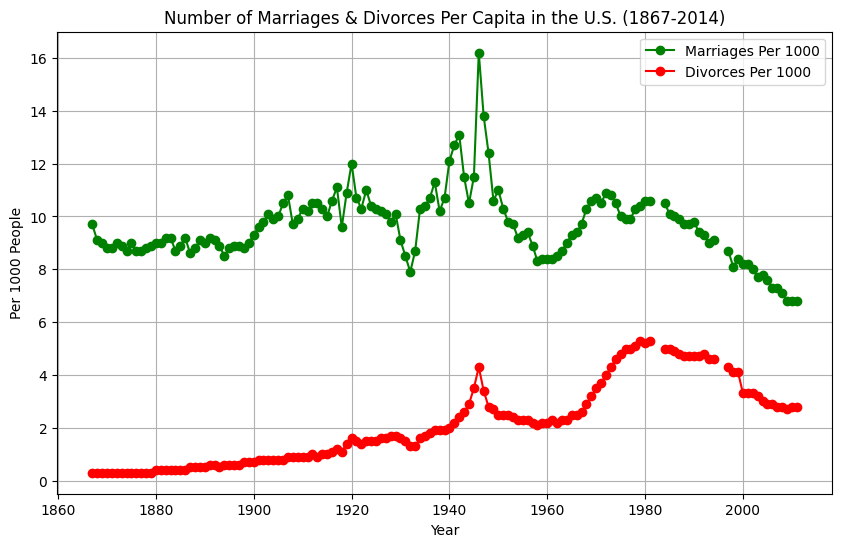

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Set up the figure for the line plot
plt.figure(figsize=(10, 6))

# Plot the number of marriages and divorces per 1000 people over the years
plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages Per 1000', marker='o', color='green')
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces Per 1000', marker='o', color='red')

# Add labels and title to the plot
plt.title('Number of Marriages & Divorces Per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Per 1000 People')

# Display legend for better interpretation
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the line plot
plt.show()


Question no 7

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


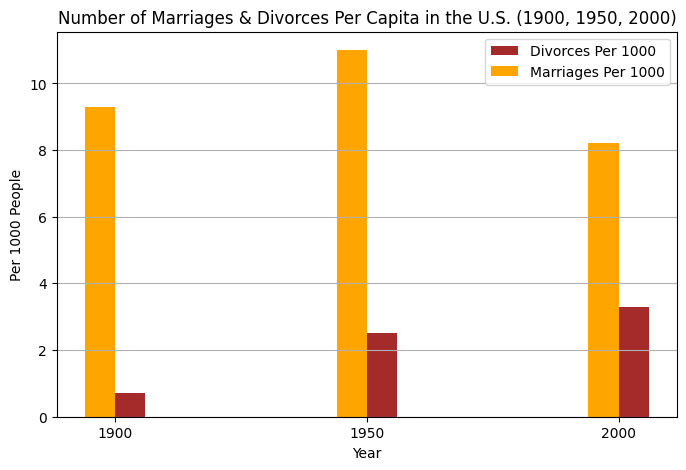

In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Filter the data for specific years: 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
df_selected_years = df[df['Year'].isin(selected_years)]

# Set up the figure for the vertical bar chart
plt.figure(figsize=(8, 5))

# Define bar width and positions for marriages and divorces
bar_width = 6
bar_positions_marriages = df_selected_years['Year'] - bar_width / 2
bar_positions_divorces = df_selected_years['Year'] + bar_width / 2

# Plot marriages and divorces per 1000 people as vertical bars
plt.bar(bar_positions_divorces, df_selected_years['Divorces_per_1000'], width=bar_width, label='Divorces Per 1000', color='brown')
plt.bar(bar_positions_marriages, df_selected_years['Marriages_per_1000'], width=bar_width, label='Marriages Per 1000', color='orange')

# Add labels and title to the chart
plt.title('Number of Marriages & Divorces Per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Per 1000 People')

# Display legend for better interpretation
plt.legend()

# Set x-axis ticks to display selected years only
plt.xticks(df_selected_years['Year'], df_selected_years['Year'])

# Add grid lines for better readability
plt.grid(axis='y')

# Show the plot
plt.show()


Question no 8

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239


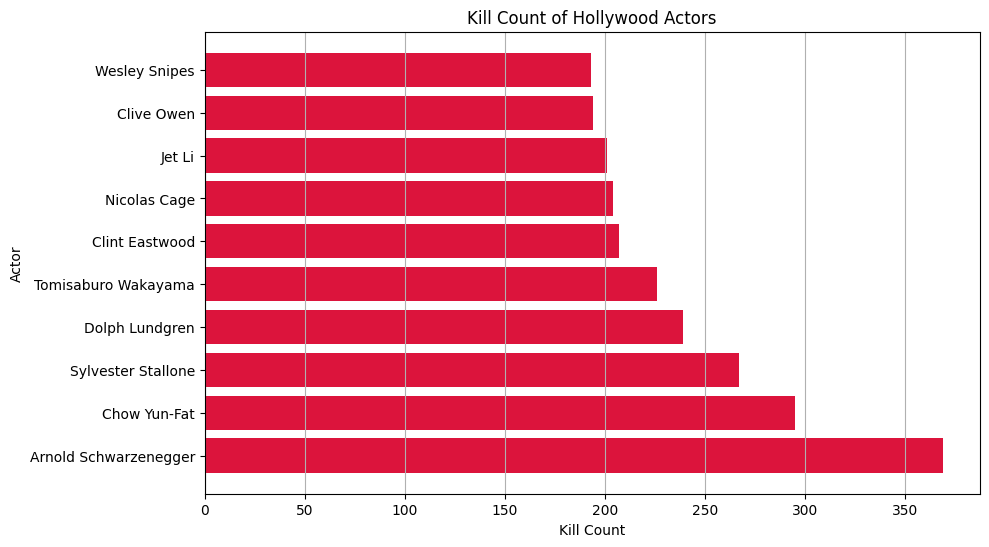

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('actor_kill_counts.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the DataFrame by the kill count in ascending order
df = df.sort_values(by='Count', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Actor'], df['Count'], color='crimson')

# Add labels and title
plt.title('Kill Count of Hollywood Actors')
plt.xlabel('Kill Count')
plt.ylabel('Actor')

# Display grid lines along the x-axis for better readability
plt.grid(axis='x')

# Show the plot
plt.show()


Question no 9

    Emperor  Length_of_Reign         Cause_of_Death
0  Augustus            40.58  Possibly assassinated
1  Tiberius            22.50  Possibly assassinated
2  Caligula             4.83           Assassinated
3  Claudius            13.75  Possibly assassinated
4      Nero            13.67                Suicide


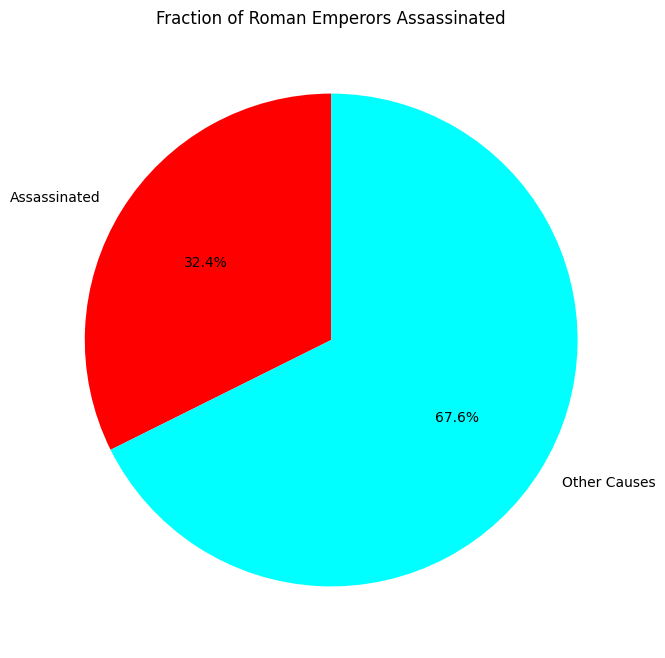

In [25]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file into a DataFrame
df = pd.read_csv('roman-emperor-reigns.csv')

# Displaying the first few rows of the DataFrame
print(df.head())

# Counting the number of emperors who were assassinated
assassinated_count = df[df['Cause_of_Death'] == 'Assassinated'].shape[0]

# Counting the number of emperors who died from other causes
natural_causes_count = df[df['Cause_of_Death'] != 'Assassinated'].shape[0]

# Creating a pie chart
plt.figure(figsize=(8, 8))

# Data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, natural_causes_count]

# Colors for each category
colors = ['#ff0000', '#00ffff']

# Creating the pie chart with percentage labels and a starting angle of 90 degrees
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Adding a title to the pie chart
plt.title('Fraction of Roman Emperors Assassinated')

# Displaying the plot
plt.show()


Question no 10

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  


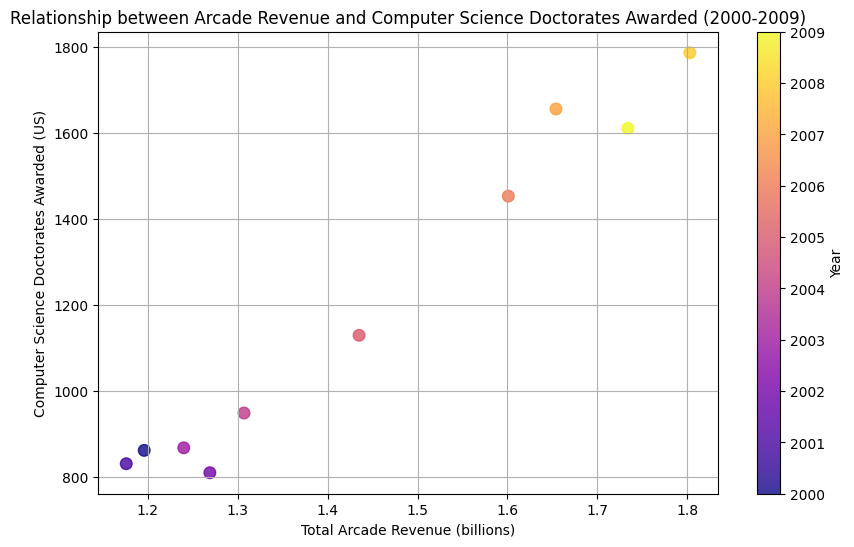

In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with a different colormap
scatter = plt.scatter(
    df['Total Arcade Revenue (billions)'],
    df['Computer Science Doctorates Awarded (US)'],
    c=df['Year'],
    cmap='plasma',  # Use a different colormap, e.g., 'plasma'
    s=70,  # Marker size
    alpha=0.8  # Transparency
)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Add labels and title
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates Awarded (2000-2009)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Show the plot
plt.grid(True)
plt.show()
